# De novo design

### Developers: Mat Bieniek, Ben Cree, Rachael Pirie, Josh Horton

* Add R-groups in user-defined positions
* Output ADMET properties
* Perform constrained optimisation
* Score poses
* Send output to free energy calculations

Open source, customisable, fast/easy to use.

In [1]:
import copy
import glob
import prody
from rdkit import Chem
from rdkit.Chem import Draw
from rgroup import RMol, RList, build_molecules, fix_receptor, optimise_in_receptor, RGroups, sort_conformers, ic50

<frozen importlib._bootstrap>:228: RuntimeWarning: to-Python converter for boost::shared_ptr<RDKit::FilterCatalogEntry const> already registered; second conversion method ignored.


In [2]:
%cd ~/rgroups/dat/mcl1/04mar_mcl1

/home/c0065492/rgroups/dat/mcl1/04mar_mcl1


In [3]:
!wget -nc https://files.rcsb.org/download/4HW2.pdb
pdb = '4HW2.pdb'

File ‘4HW2.pdb’ already there; not retrieving.



In [4]:
RMol.set_gnina(loc='/home/c0065492/software/gnina')

In [5]:
# load the complex with the ligand
sys = prody.parsePDB(pdb)
#sys = prody.parsePDB('jnk1/2gmx.pdb')

rec = sys.select('not (nucleic or hetatm) and not water')
mol = sys.select('resname XEY')
#

prody.writePDB('rec.pdb', rec)
#prody.writePDB('lig.pdb', mol)

@> 7376 atoms and 1 coordinate set(s) were parsed in 0.07s.


'rec.pdb'

In [6]:
#!wget 'https://models.rcsb.org/v1/5nev/ligand?auth_seq_id=301&label_asym_id=E&encoding=sdf&filename=5nev_E_72L.sdf' -O lig.sdf
#!obabel jnk1/core.sdf -O jnk1/coreh.sdf -p 7
!obabel -isdf core.sdf -osdf -O coreh.sdf -p 7
# ^manually modify the files if need be

*** Open Babel Warning  in ReadMolecule
  Failed to kekulize aromatic bonds in MOL file (title is 4HW2)

1 molecule converted


In [7]:
# load the ligand
# rdkit doesn't do a good job with protonation, 
#init_mol = Chem.MolFromPDBFile('lig.pdb', removeHs=False)
#init_mol = Chem.AddHs(init_mol, addCoords=True)

init_mol = Chem.SDMolSupplier('coreh.sdf', removeHs=False)[0]

# get the R group representation of the rdkit Mol
rinit_mol = RMol(init_mol)

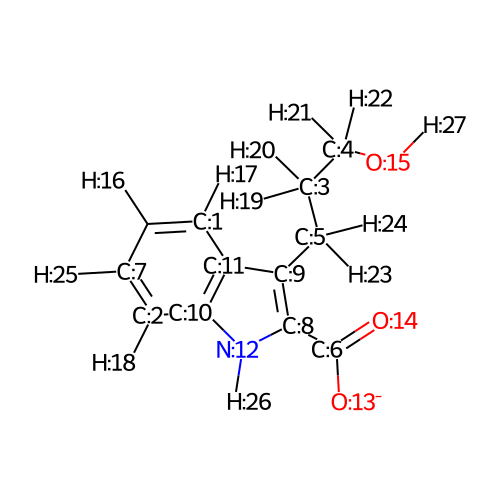

In [8]:
# select the atom to be replaced with the R group
rinit_mol.rep2D(idx=True, size=(500, 500))

In [9]:
ligand_ids = list(range(27,49))
# read the rgroups 1 by 1 in a loop
# assumes that there is only one -r.mol in each dir
rgroups = [Chem.MolFromMolFile(glob.glob(f'{ligand_id}/*-r.mol')[0], removeHs=False) for ligand_id in ligand_ids]
rgroups

In [10]:
ligand_ids

[27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48]

In [11]:
# build a list of molecules
attachment_index = [27]
rmols = build_molecules(rinit_mol, attachment_index, rgroups)

Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7400> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca75e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7a60> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca78e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7400> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca75e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7a60> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca78e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7400> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca75e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7a60> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca78e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom object at 0x7f3921ca7400> neighbouring <rdkit.Chem.rdchem.Atom object at 0x7f3921ca75e0>
Rgroup atom index <rdkit.Chem.rdchem.QueryAtom o

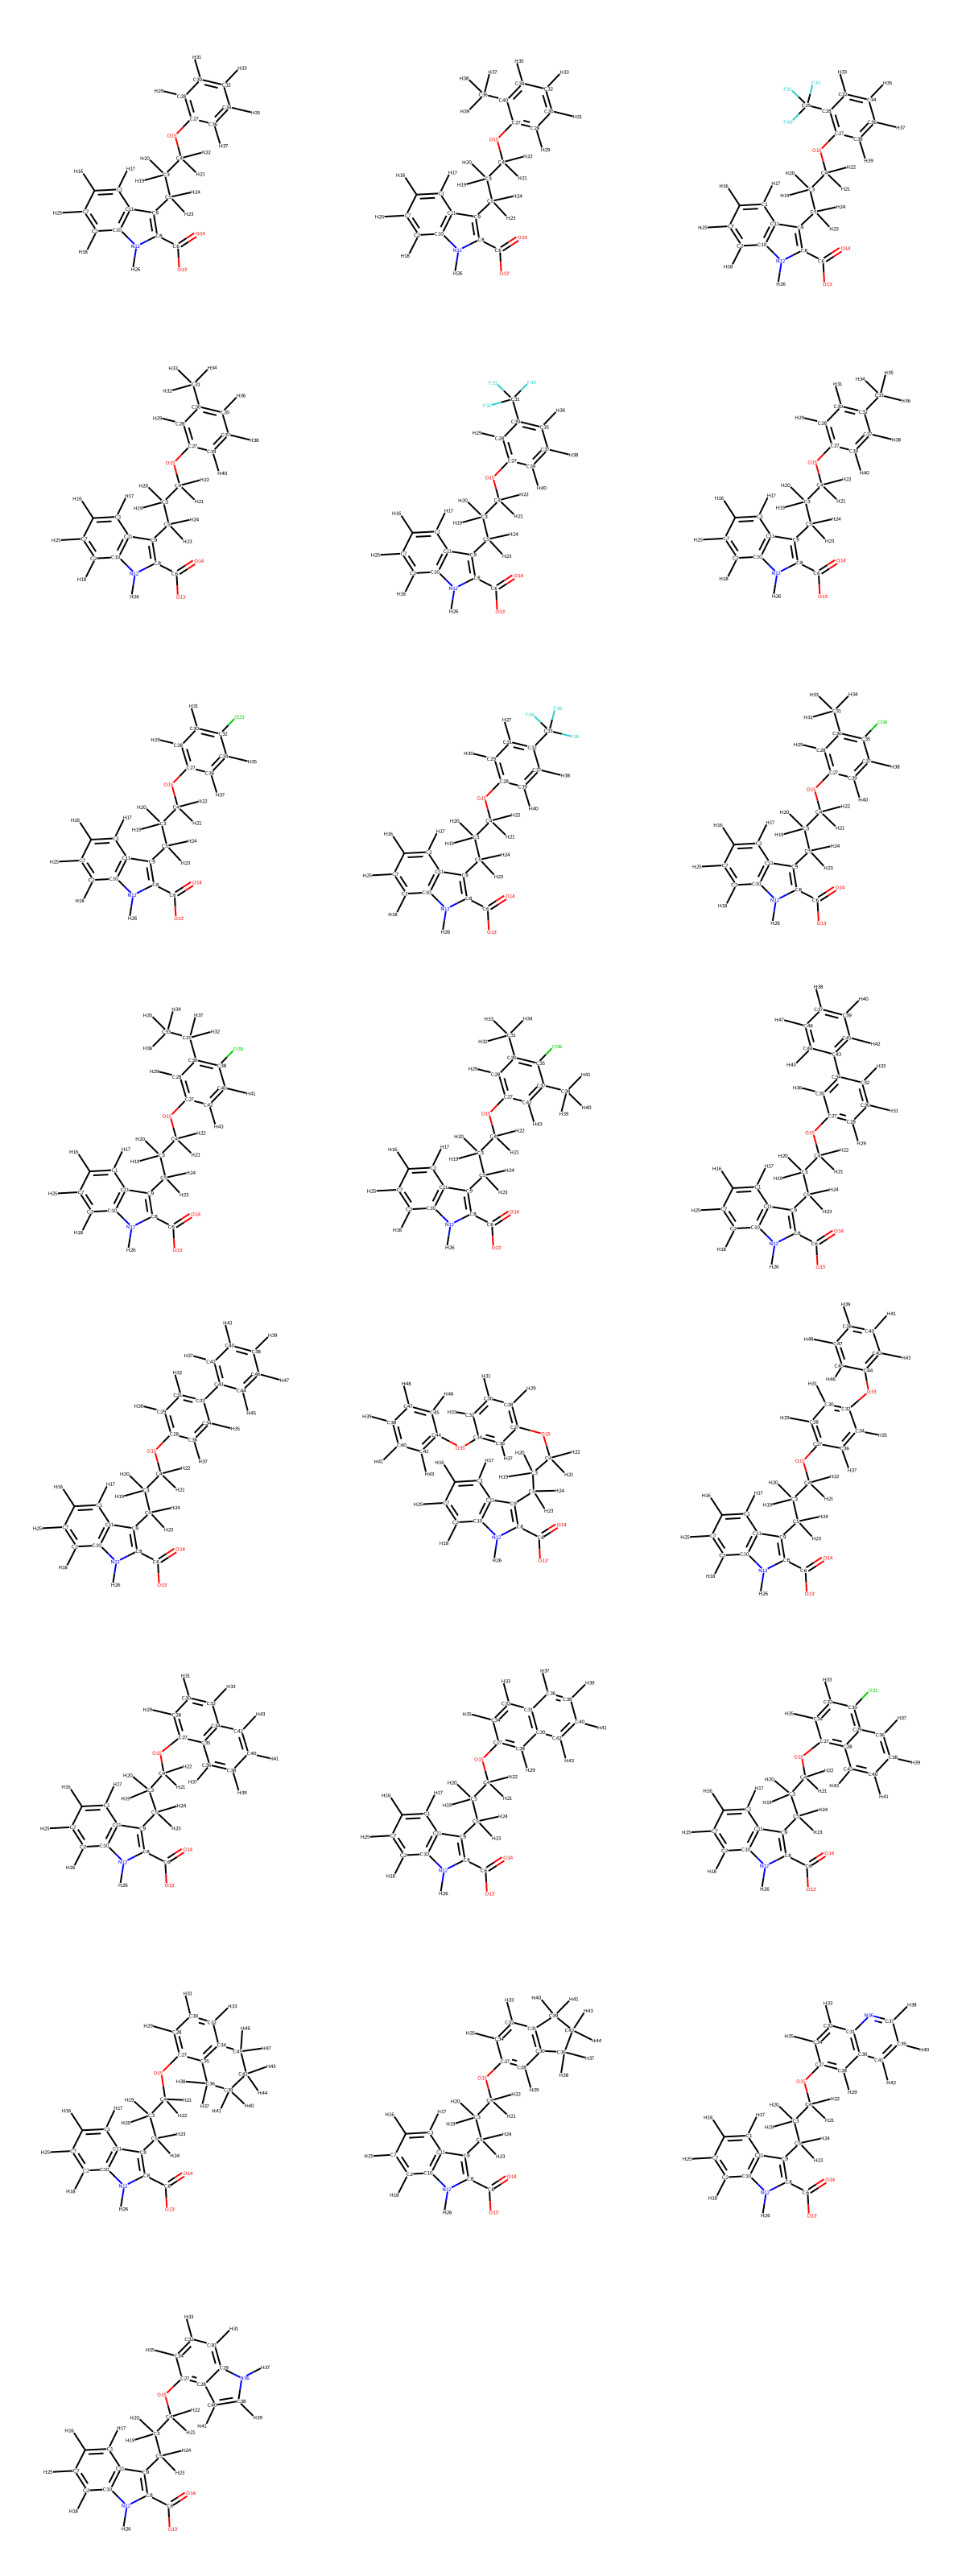

In [12]:
rmols.rep2D()

In [13]:
rmols[9].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [14]:
rmols.toxicity()

MW  HBA  HBD     LogP  Pass_Ro5  has_pains  has_unwanted_subs  \
0  294.113567    3    1  2.54300      True       True              False   
0  308.129217    3    1  2.85142      True       True              False   
0  362.100952    3    1  3.56180      True       True              False   
0  308.129217    3    1  2.85142      True       True              False   
0  362.100952    3    1  3.56180      True       True              False   
0  308.129217    3    1  2.85142      True       True              False   
0  328.074595    3    1  3.19640      True       True              False   
0  362.100952    3    1  3.56180      True       True              False   
0  342.090245    3    1  3.50482      True       True              False   
0  356.105895    3    1  3.75880      True       True              False   
0  356.105895    3    1  3.81324      True       True              False   
0  370.144867    3    1  4.21000      True       True              False   
0  370.144867    3    1  4.21000      True       True              False   
0  386.139782    4    1  4.33530      True       True              False   
0  386.139782    4    1  4.33530      True       True              False   
0  344.129217    3    1  3.69620      True       True              False   
0  344.129217    3    1  3.69620      True       True              False   
0  378.090245    3    1  4.34960      True       True              False   
0  348.160517    3    1  3.42180      True       True              False   
0  334.144867    3    1  3.03170      True       True              False   
0  345.124466    4    1  3.09120      True       True              False   
0  333.124466    3    2  3.02430      True       True              False   

   has_prob_fgs  synthetic_accessibility  
0         False                 7.781388  
0         False                 7.915977  
0         False                 7.361165  
0         False                 7.915977  
0         False                 7.361165  
0         False                 7.915977  
0         False                 7.548513  
0         False                 7.361165  
0         False                 7.698929  
0         False                 7.891150  
0         False                 7.844257  
0         False                 4.481367  
0         False                 3.711398  
0         False                 7.960694  
0         False                 7.944778  
0         False                 7.859249  
0         False                 7.859249  
0         False                 7.691848  
0         False                 6.593397  
0         False                 5.362862  
0         False                 7.745286  
0         False                 7.799056

In [15]:
rmols.generate_conformers(num_conf=200, 
                         minimum_conf_rms=0.5,
                         #flexible=
                         )

RMol index 0
removed 196 duplicated conformations
RMol index 1
removed 193 duplicated conformations
RMol index 2
removed 187 duplicated conformations
RMol index 3
removed 193 duplicated conformations
RMol index 4
removed 191 duplicated conformations
RMol index 5
removed 192 duplicated conformations
RMol index 6
removed 196 duplicated conformations
RMol index 7
removed 190 duplicated conformations
RMol index 8
removed 195 duplicated conformations
RMol index 9
removed 184 duplicated conformations
RMol index 10
removed 178 duplicated conformations
RMol index 11
removed 184 duplicated conformations
RMol index 12
removed 184 duplicated conformations
RMol index 13
removed 170 duplicated conformations
RMol index 14
removed 167 duplicated conformations
RMol index 15
removed 193 duplicated conformations
RMol index 16
removed 196 duplicated conformations
RMol index 17
removed 193 duplicated conformations
RMol index 18
removed 156 duplicated conformations
RMol index 19
removed 188 duplicated conf

In [16]:
#rmol.rep3D(template=True)

In [17]:
rmols.GetNumConformers()

[5, 8, 14, 8, 10, 9, 5, 11, 6, 17, 23, 17, 17, 31, 34, 8, 5, 8, 45, 13, 5, 9]

### Optimise conformers in context of protein

In [18]:
# fix the receptor file 
fix_receptor("rec.pdb", "rec_h.pdb")
# load back into prody
rec_fix = prody.parsePDB("rec_h.pdb")

@> 14571 atoms and 1 coordinate set(s) were parsed in 0.09s.


In [19]:
# filter by the protein clashes
rmols[0].rep3D(prody=rec_fix)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [20]:
rmols.removeConfsClashingWithProdyProt(rec_fix)

RMol index 0
Clash with the protein. Removing conformer id: 4
Clash with the protein. Removing conformer id: 3
Clash with the protein. Removing conformer id: 0
RMol index 1
Clash with the protein. Removing conformer id: 7
Clash with the protein. Removing conformer id: 6
Clash with the protein. Removing conformer id: 5
Clash with the protein. Removing conformer id: 4
Clash with the protein. Removing conformer id: 1
Clash with the protein. Removing conformer id: 0
RMol index 2
Clash with the protein. Removing conformer id: 13
Clash with the protein. Removing conformer id: 12
Clash with the protein. Removing conformer id: 10
Clash with the protein. Removing conformer id: 9
Clash with the protein. Removing conformer id: 7
Clash with the protein. Removing conformer id: 5
Clash with the protein. Removing conformer id: 4
Clash with the protein. Removing conformer id: 0
RMol index 3
Clash with the protein. Removing conformer id: 5
Clash with the protein. Removing conformer id: 4
Clash with the

In [21]:
rmols[0].rep3D(prody=rec_fix)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
# opt_mol, energies
energies = rmols.optimise_in_receptor(
    receptor_file="rec_h.pdb", 
    ligand_force_field="openff", 
    use_ani=True,
    sigma_scale_factor=0.8,
    relative_permittivity=4
)

RMol index 0


Optimising conformer: 100%|███████████████████████| 2/2 [00:40<00:00, 20.09s/it]


RMol index 1


Optimising conformer: 100%|███████████████████████| 2/2 [00:32<00:00, 16.24s/it]


RMol index 2


Optimising conformer: 100%|███████████████████████| 6/6 [02:06<00:00, 21.15s/it]


RMol index 3


Optimising conformer: 100%|███████████████████████| 4/4 [01:16<00:00, 19.01s/it]


RMol index 4


Optimising conformer: 100%|███████████████████████| 6/6 [01:40<00:00, 16.79s/it]


RMol index 5


Optimising conformer: 100%|███████████████████████| 4/4 [01:07<00:00, 16.97s/it]


RMol index 6


Optimising conformer: 100%|███████████████████████| 2/2 [00:34<00:00, 17.13s/it]


RMol index 7


Optimising conformer: 100%|███████████████████████| 6/6 [01:43<00:00, 17.32s/it]


RMol index 8


Optimising conformer: 100%|███████████████████████| 3/3 [01:07<00:00, 22.48s/it]


RMol index 9


Optimising conformer: 100%|███████████████████████| 2/2 [00:31<00:00, 15.96s/it]


RMol index 10


Optimising conformer: 100%|█████████████████████| 12/12 [05:06<00:00, 25.58s/it]


RMol index 11
RMol index 12
RMol index 13
RMol index 14
RMol index 15


Optimising conformer: 100%|███████████████████████| 1/1 [00:25<00:00, 25.09s/it]


RMol index 16


Optimising conformer: 100%|███████████████████████| 2/2 [00:39<00:00, 19.95s/it]


RMol index 17


Optimising conformer: 100%|███████████████████████| 1/1 [00:25<00:00, 25.19s/it]


RMol index 18


Optimising conformer: 100%|███████████████████████| 5/5 [01:18<00:00, 15.65s/it]


RMol index 19


Optimising conformer: 100%|███████████████████████| 4/4 [01:15<00:00, 18.90s/it]


RMol index 20


Optimising conformer: 100%|███████████████████████| 2/2 [00:36<00:00, 18.27s/it]


RMol index 21


Optimising conformer: 100%|███████████████████████| 3/3 [00:58<00:00, 19.48s/it]


In [23]:
rmols[0].rep3D()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [24]:
for i in range(len(ligand_ids)):
    rmols[i].to_file("optimised_coords_" + str(ligand_ids[i]) + ".pdb")

In [25]:
missing_ids = rmols.discard_missing()

Discarding a molecule (id 14) due to the lack of conformers. 
Discarding a molecule (id 13) due to the lack of conformers. 
Discarding a molecule (id 12) due to the lack of conformers. 
Discarding a molecule (id 11) due to the lack of conformers. 


In [28]:
filtered_list = copy.copy(ligand_ids)
filtered_list = [e for i, e in enumerate(filtered_list) if i not in missing_ids] #pro oneliner


#for i in missing_ids:
#    filtered_list[i] = 'x'
#print(filtered_list)
#for ids in filtered_list[:]:
#    print(ids)
#    if ids == 'x':
#       filtered_list.remove(ids)

In [29]:
filtered_list

[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 42, 43, 44, 45, 46, 47, 48]

In [30]:
final_energies = rmols.sort_conformers(energy_range=5)

RMol index 0
RMol index 1
RMol index 2
RMol index 3
RMol index 4
RMol index 5
RMol index 6
RMol index 7
RMol index 8
RMol index 9
RMol index 10
RMol index 11
RMol index 12
RMol index 13
RMol index 14
RMol index 15
RMol index 16
RMol index 17


In [31]:
len(filtered_list) == len(rmols) #check theyre equal or very bad and silent things happen

True

In [32]:
for i in range(len(filtered_list)):
    rmols[i].to_file("best_conformers_" + str(filtered_list[i]) + ".pdb")

In [33]:
print(final_energies)

[[0.0, 0.0007673666696064174], [0.0, 4.5114959820057265], [0.0, 0.044727294909534976, 0.04926774129853584, 3.100482041190844, 3.1055025168752763, 3.112231577630155], [0.0, 0.1618858290312346, 1.523051224212395, 1.7124345473130234], [0.0, 0.0018742200336419046, 0.0062882381898816675, 2.594979413843248, 3.286782598879654, 3.324104103288846], [0.0, 0.03436666776542552, 0.7650131507543847, 0.7652129449124914], [0.0, 0.0008210043888539076], [0.0, 0.022418426407966763, 0.03326864217524417, 0.8605400688538793, 0.8605716681631748, 0.8609888335631695], [0.0, 1.9544073379947804, 2.7762732458359096], [0.0, 0.000961355195613578], [0.0, 0.01901243213796988, 0.019659614335978404, 0.020305217389250174, 0.020882788172457367, 0.021767800382804126, 0.023945279303006828, 0.02523893243051134, 0.025259620684664696, 0.05428884568391368, 1.0321783691470046, 3.757143198075937], [0.0], [0.0, 2.837979000672931], [0.0], [0.0, 0.002702717378269881, 0.005569514934904873, 0.009633493464207277, 0.010301609989255667]

In [34]:
CNNscores = rmols.gnina(receptor_file="rec_h.pdb") 
CNNscores

RMol index 0
RMol index 1
RMol index 2
RMol index 3
RMol index 4
RMol index 5
RMol index 6
RMol index 7
RMol index 8
RMol index 9
RMol index 10
RMol index 11
RMol index 12
RMol index 13
RMol index 14
RMol index 15
RMol index 16
RMol index 17


[[5.40741, 5.40738],
 [5.62957, 5.69244],
 [5.92978, 5.92954, 5.92957, 6.0578, 6.05785, 6.05791],
 [5.72289, 5.72489, 5.75384, 5.77007],
 [6.081, 6.08099, 6.0809, 6.09913, 6.09793, 6.09776],
 [5.70421, 5.70313, 5.6925, 5.69245],
 [5.91082, 5.91082],
 [6.19136, 6.19107, 6.19093, 6.15258, 6.15259, 6.15259],
 [6.14575, 6.18754, 6.12702],
 [6.37803, 6.37777],
 [6.41933,
  6.42452,
  6.41909,
  6.41908,
  6.41904,
  6.419,
  6.41905,
  6.41904,
  6.41902,
  6.41894,
  6.39965,
  6.34912],
 [6.0673],
 [6.30882, 6.17775],
 [6.50148],
 [6.18789, 6.18787, 6.18783, 6.18813, 6.18792],
 [6.27017, 6.26976, 6.26972, 6.25146],
 [6.23017, 6.12939],
 [6.07691, 5.79091]]

In [35]:
ic50_scores = []
for i in range(len(CNNscores)):
    ic50_scores.append([ic50(x) for x in CNNscores[i]])

In [36]:
ic50_scores

[[3913.7222382997666, 3913.992597992071],
 [2346.5510128671967, 2030.2989966568266],
 [1175.4928720623914,
  1176.1426529543414,
  1176.0614107041845,
  875.3868129426661,
  875.2860361126541,
  875.1651192307581],
 [1892.8229803926138,
  1884.1262487702681,
  1762.6253019661663,
  1697.969949983862],
 [829.8507675144217,
  829.8698757544805,
  830.0418697157014,
  795.9210668777772,
  798.1233191811892,
  798.4357973010431],
 [1976.0139216231628,
  1980.9339720738838,
  2030.0185198596844,
  2030.2522478330059],
 [1227.9480675883685, 1227.9480675883685],
 [643.6355151294317,
  644.0654460638916,
  644.2731017015304,
  703.7525799798193,
  703.7363756643816,
  703.7363756643816],
 [714.9077416264225, 649.3218240719093, 746.4143839658976],
 [418.7646368824734, 419.0154146565078],
 [380.7763793353283,
  376.253024776667,
  380.9868622921197,
  380.99563493981526,
  381.03072755064545,
  381.06582339377337,
  381.0219540949212,
  381.03072755064545,
  381.0482750681536,
  381.118473219674

In [37]:
for i in range(len(ic50_scores)):
    with open('scores_' + str(ligand_ids[i]) + '.dat', 'w') as f:
        for x in range(len(ic50_scores[i])):
            f.write(str(ic50_scores[i][x])+'\n')

In [38]:
len(filtered_list) == len(ic50_scores)

True

In [ ]:
import dill
#dill.dump_session('10feb_mcl1.db')

In [39]:
lowest = []
for i in range(len(ic50_scores)):
    lowest.append(ic50_scores[i][0])

In [40]:
import yaml
prefix = "lig_"
with open("ligands.yml", "r") as stream:
    try:
        data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)
suffix = ''
experimental = []
for i in range(len(ligand_ids)):
    if data[prefix + str(ligand_ids[i])+suffix]['measurement']['unit'] == 'nM':
        print('found nM')
        experimental.append(data[prefix+ str(ligand_ids[i])+suffix]['measurement']['value'])
    elif data[prefix + str(ligand_ids[i])+suffix]['measurement']['unit'] == 'uM':
        experimental.append(1000*data[prefix+ str(ligand_ids[i])+suffix]['measurement']['value'])
    else:
        print('UNKNOWN UNIT - SKIPPING')
experimental 

[35000.0,
 15000,
 8800.0,
 1900.0,
 1700.0,
 16000,
 9800.0,
 9900.0,
 380.0,
 1100.0,
 300.0,
 7700.0,
 7600.0,
 5200.0,
 6400.0,
 330.0,
 7500.0,
 480.0,
 300.0,
 2900.0,
 62000,
 14000]

In [41]:
filtered_experimental = copy.copy(experimental)
for i in missing_ids:
    filtered_experimental[i] = 'x'
print(filtered_experimental)
for ids in filtered_experimental[:]:
    print(ids)
    if ids == 'x':
        filtered_experimental.remove(ids)

[35000.0, 15000, 8800.0, 1900.0, 1700.0, 16000, 9800.0, 9900.0, 380.0, 1100.0, 300.0, 'x', 'x', 'x', 'x', 330.0, 7500.0, 480.0, 300.0, 2900.0, 62000, 14000]
35000.0
15000
8800.0
1900.0
1700.0
16000
9800.0
9900.0
380.0
1100.0
300.0
x
x
x
x
330.0
7500.0
480.0
300.0
2900.0
62000
14000


In [42]:
filtered_experimental

[35000.0,
 15000,
 8800.0,
 1900.0,
 1700.0,
 16000,
 9800.0,
 9900.0,
 380.0,
 1100.0,
 300.0,
 330.0,
 7500.0,
 480.0,
 300.0,
 2900.0,
 62000,
 14000]

In [43]:
import matplotlib.pyplot as plt

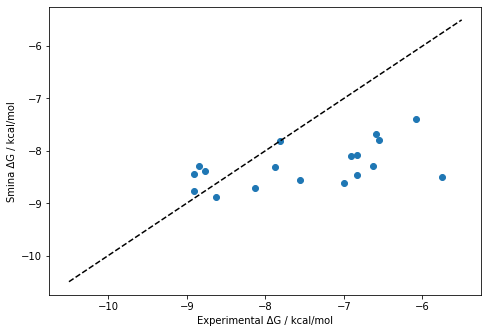

In [44]:
# convert nM to M
import numpy as np
exptinM = [ i * 1e-9 for i in filtered_experimental]
lowestinM = [ i * 1e-9 for i in lowest]
RT = 0.593 # kcal/mol

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

# DG = RTln(K)
ax.scatter(RT*np.log(exptinM), RT*np.log(lowestinM)) #, color='black', marker='x')
ax.set_xlabel('Experimental \u0394G / kcal/mol')
ax.set_ylabel('Smina \u0394G / kcal/mol')

x = np.linspace(-10.5,-5.5,10)
ax.plot(x, x, color='black', linestyle='--')
A = np.vstack([exptinM, np.ones(len(filtered_experimental))]).T
m, c = np.linalg.lstsq(RT*np.log(A), RT*np.log(lowestinM), rcond=None)[0]

m = "{:.2f}".format(m)
r = "r^2 =" + str(m)
#plt.annotate(r, (-10,-9))
plt.savefig('deltaG2_mcl1.png', bbox_inches='tight')
plt.show()

In [45]:
dG_xpt = RT*np.log(exptinM) #experimental scores in M
dG_gnina = RT*np.log(lowestinM) #gnina scores in M
rmse = np.sqrt(np.mean(np.square(dG_xpt - dG_gnina)))
rmse

1.1854469354074484

In [46]:
with open('CNNdat.dat', 'w') as f:
    for i in range(len(CNNscores)):
        f.write(str(CNNscores[i][0])+  '\n')

In [47]:
r = np.corrcoef(dG_xpt, dG_gnina)
r**2

array([[1.        , 0.27137229],
       [0.27137229, 1.        ]])

In [ ]:
#import dill
#dill.load_session('04mar_mcl1.db')